In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import product

# 1.3 Regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import math
from sklearn.preprocessing import MinMaxScaler


In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

In [3]:
df = pd.read_csv('data/wheat_new.csv',decimal=',')

In [4]:
dftrain = df[(df.dataset=='train')|(df.dataset=='validation')]
dftrain.loc[:,'dataset'] =  dftrain['dataset'].apply(lambda x: x=='validation')
df.loc[:,'dataset'] =  df['dataset'].apply(lambda x: x=='test')

In [5]:
dftrain.columns

Index(['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº', 'species',
       'water_treatment', 'management', 'plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)', 'dataset'],
      dtype='object')

In [6]:
dftrain = dftrain.drop(columns = ['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº'])
df = df.drop(columns = ['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº'])

In [7]:
dftrain = dftrain[dftrain.dataset==False]
dfvalid = dftrain[dftrain.dataset==True]
dftest = df[df.dataset==True]

In [8]:
dftrain = dftrain.drop(columns ='dataset')
dfvalid = dfvalid.drop(columns ='dataset')
dftest = dftest.drop(columns ='dataset')

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cat_attribs = ['species', 'water_treatment', 'management']
numerical_ix = ['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs),
                                   ('num', MinMaxScaler(), numerical_ix)], remainder='passthrough')
encoder = full_pipeline.fit(dftrain)
dftrain = encoder.transform(dftrain)
dftest = encoder.transform(dftest)

In [19]:
dftrain[0]

array([1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.77855122, 0.9842334 , 0.97303752, 0.01764349, 0.98381877,
       0.42724332, 0.85555246])

In [18]:
np.unique(df['avg_height'])

array([18.00375, 18.93675, 46.9715 , 55.211  ])

In [11]:
x_train,y_train = dftrain[:,:-1],dftrain[:,-1]
x_test,y_test = dftest[:,:-1],dftest[:,-1]

In [21]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(random_state=2),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(random_state=2),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, max_depth=30, random_state=2),
    "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=100, max_depth=30, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5,random_state=2),
    "GBR" :GradientBoostingRegressor(random_state=2),
    "AdaB" :AdaBoostRegressor(random_state=2),
    "XGBOOST" : XGBRegressor(random_state=2),
    
}
for name, estimator in ESTIMATORS.items():     
    estimator.fit(x_train, y_train)  
    print("%s\t%f\t%f\t%f" % (name,mean_absolute_error(y_test*(10.55-0.8579)+0.8579, estimator.predict(x_test)*(10.55-0.8579)+0.8579),
          mean_squared_error(y_test*(10.55-0.8579)+0.8579, estimator.predict(x_test)*(10.55-0.8579)+0.8579),
        math.sqrt(mean_squared_error(y_test*(10.55-0.8579)+0.8579, estimator.predict(x_test)*(10.55-0.8579)+0.8579))))

Extra trees	0.670400	0.676801	0.822679
K-nn	0.663588	0.632749	0.795455
Linear regression	0.680238	0.686780	0.828722
Ridge	0.717220	0.772681	0.879022
Lasso	3.785050	16.141466	4.017644
ElasticNet	3.785050	16.141466	4.017644
RandomForestRegressor	0.652033	0.609116	0.780459
ExtraTreesRegressor	0.670400	0.676801	0.822679
Decision Tree Regressor	0.706311	0.786586	0.886897
GBR	0.677776	0.697503	0.835167
AdaB	0.715230	0.768103	0.876415
XGBOOST	0.614181	0.612807	0.782820


In [24]:
model = XGBRegressor(random_state=2)
model.fit(x_train, y_train)  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2, ...)

In [25]:
from matplotlib import pyplot


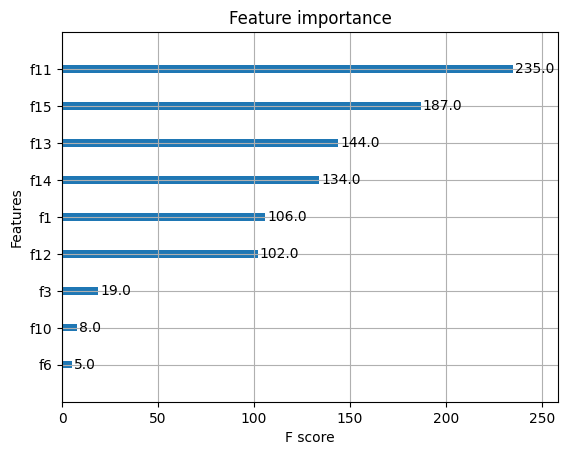

In [27]:
from xgboost import plot_importance
plot_importance(model)
pyplot.show()


In [31]:
np.unique(df['management'])

array(['conv', 'eco'], dtype=object)

In [33]:
len(x_train[0])

16